# Base Model Test 
Having explored the data gotten an idea of what each feature looks like, I will now run a few models to get a baseline as well as do a bit of feature selection. 

## Set-up the Data 
As always I will start by importing the necessary packages and setting up the dataframes.

In [90]:
#Code for importing packages
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")  
import numpy as np 
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 
from scipy.spatial.distance import euclidean 
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier   
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel 

In [91]:
df = pd.read_csv('data_nd.csv') #Sets up dataframe that contains no dummies
del df['Unnamed: 0'] #deletes old index column
dfd = pd.read_csv('data_ad.csv') #Sets up dataframe that contains all dummies
del dfd['Unnamed: 0'] #deletes old index column

df.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,location,offspring,pets,religion,sign,smokes,speaks,works_in_tech,above_average_height
0,22,male,straight,body_curvy/full_figured,diet_anything,drinks,no_drugs,no_college_degree,asian,75.0,san_francisco_ca,no_kids,likes_dogs_and_cats,agnosticism,gemini,smokes,speaks_english,0,above_average_height
1,35,male,straight,body_average,diet_other,drinks,drugs,unknown_education,white,70.0,not_san_francisco,no_kids,likes_dogs_and_cats,agnosticism,cancer,does_not_smoke,speaks_spanish,0,above_average_height
2,29,male,straight,body_fit/athletic,unkown_diet,drinks,no_drugs,college_graduate_or_higher,black,66.0,san_francisco_ca,unknown_if_kids,likes_dogs_and_cats,religion_other/unknown,aquarius,does_not_smoke,speaks_english,0,above_average_height
3,29,male,straight,body_average,diet_anything,drinks,unknown_if_drugs,college_graduate_or_higher,white,67.0,san_francisco_ca,no_kids,likes_cats,atheism,taurus,does_not_smoke,speaks_chinese,1,above_average_height
4,31,female,straight,body_average,diet_anything,drinks,no_drugs,college_graduate_or_higher,white,65.0,san_francisco_ca,no_kids,likes_dogs_and_cats,christianity,sagittarius,does_not_smoke,speaks_spanish,0,above_average_height


In [92]:
df.works_in_tech.value_counts()

0    28760
1     9557
Name: works_in_tech, dtype: int64

In [93]:
dfd.works_in_tech.value_counts()

0    28760
1     9557
Name: works_in_tech, dtype: int64

In [94]:
#Feature Selection
all_features = df.drop(["works_in_tech"],axis=1) 
target = df["works_in_tech"]
all_features.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,location,offspring,pets,religion,sign,smokes,speaks,above_average_height
0,22,male,straight,body_curvy/full_figured,diet_anything,drinks,no_drugs,no_college_degree,asian,75.0,san_francisco_ca,no_kids,likes_dogs_and_cats,agnosticism,gemini,smokes,speaks_english,above_average_height
1,35,male,straight,body_average,diet_other,drinks,drugs,unknown_education,white,70.0,not_san_francisco,no_kids,likes_dogs_and_cats,agnosticism,cancer,does_not_smoke,speaks_spanish,above_average_height
2,29,male,straight,body_fit/athletic,unkown_diet,drinks,no_drugs,college_graduate_or_higher,black,66.0,san_francisco_ca,unknown_if_kids,likes_dogs_and_cats,religion_other/unknown,aquarius,does_not_smoke,speaks_english,above_average_height
3,29,male,straight,body_average,diet_anything,drinks,unknown_if_drugs,college_graduate_or_higher,white,67.0,san_francisco_ca,no_kids,likes_cats,atheism,taurus,does_not_smoke,speaks_chinese,above_average_height
4,31,female,straight,body_average,diet_anything,drinks,no_drugs,college_graduate_or_higher,white,65.0,san_francisco_ca,no_kids,likes_dogs_and_cats,christianity,sagittarius,does_not_smoke,speaks_spanish,above_average_height


In [95]:
#Feature Selection
all_featuresd = dfd.drop(["works_in_tech"],axis=1) 
targetd = dfd["works_in_tech"]
all_featuresd.head()

,age,height,female,male,bisexual,gay,straight,body_average,body_curvy/full_figured,body_fit/athletic,...,virgo,language_unknown,speaks_bengali,speaks_chinese,speaks_english,speaks_hindi,speaks_japanese,speaks_portuguese,speaks_russian,speaks_spanish
0,22,75.0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,35,70.0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,29,66.0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,29,67.0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,31,65.0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model Test 
Now we can begin our model test. 

#### Logistic Regression 
First I will look at logistic regression as well as a few metrics from the confusion matrix.

In [96]:
#Set Variables
X = all_featuresd
y = targetd

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
AUC: 0.7278817579548941
AUC: 0.7278817579548941


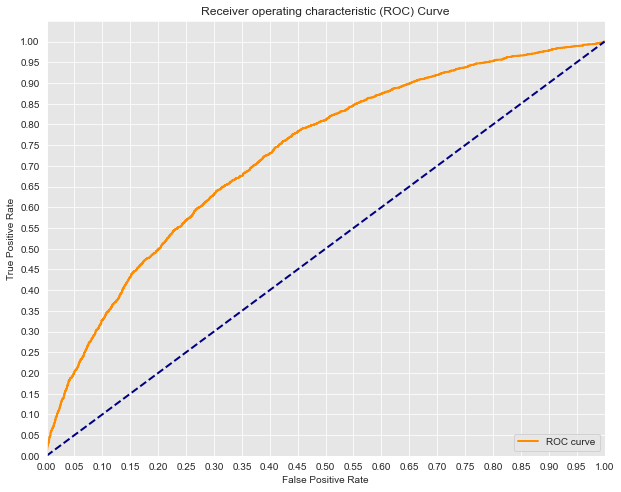

In [97]:
# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score) 

#Calculate AUC 
print('AUC: {}'.format(auc(fpr, tpr))) 
#Example visualizing of ROC and AUC: 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show() 


In [98]:
# Normalize the data
for col in dfd.columns:
    dfd[col] = (dfd[col] - min(dfd[col]))/ (max(dfd[col]) - min(dfd[col]))

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


[[27592  1168]
 [ 7866  1691]]


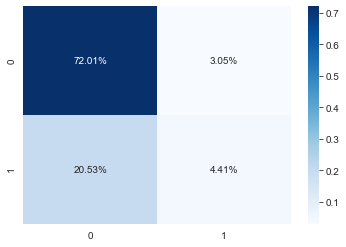

In [99]:
y_pred = logreg.predict(X)
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues') 
plt.show()

In [100]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [101]:
def precision(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp) 

def recall(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn) 

def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat)) 

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [102]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.5884561238854997
Testing Precision:  0.6002747252747253



Training Recall:  0.1752375628842929
Testing Recall:  0.18200749687630155



Training Accuracy:  0.7641020287434318
Testing Accuracy:  0.7646137787056367



Training F1-Score:  0.2700549154732421
Testing F1-Score:  0.27932246724193033


### KNN Model 
Now I will run my model without dummies thru a KNN model. 

In [103]:
df1 = df.copy()

In [104]:
#Dummy the target variable
one_hot_df = pd.get_dummies(df1)
one_hot_df.head()

labels = one_hot_df['works_in_tech']
one_hot_df.drop('works_in_tech', axis=1, inplace=True) 

#Split the data
X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.20, random_state=42) 

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_df.columns)

In [105]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [106]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.4148148148148148
Recall Score: 0.26073460941541643
Accuracy Score: 0.7207724425887265
F1 Score: 0.32020330368487926


In [107]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score)) 

In [108]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 1
F1-Score: 0.3443877551020408


### Decision Tree Model 
Now I will run my model without dummies thru a decision model. 

In [109]:
df2 = dfd.copy()

In [110]:
df2.head()

,age,height,works_in_tech,female,male,bisexual,gay,straight,body_average,body_curvy/full_figured,...,virgo,language_unknown,speaks_bengali,speaks_chinese,speaks_english,speaks_hindi,speaks_japanese,speaks_portuguese,speaks_russian,speaks_spanish
0,0.078431,0.851852,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.215686,0.518519,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.215686,0.555556,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.254902,0.481481,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
X = df2.drop(["works_in_tech"],axis=1) 
y = df2["works_in_tech"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# ohe = OneHotEncoder()
# ohe.fit(X_train)
# X_train_ohe = ohe.transform(X_train).toarray() 
# X_test_ohe = ohe.transform(X_test).toarray()

In [112]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy')

In [113]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.5888501742160279
Testing Precision:  0.6021314387211367



Training Recall:  0.17733473242392445
Testing Recall:  0.17537506466632177



Training Accuracy:  0.764590741526115
Testing Accuracy:  0.7627870563674322



Training F1-Score:  0.27258064516129027
Testing F1-Score:  0.27163461538461536


In [114]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

DecisionTreeClassifier(criterion='entropy', random_state=10)

### Random Forest Tree Model 
Now I will run my model without dummies thru a random forest model. 

In [115]:
all_featuresd = dfd.drop(["works_in_tech"],axis=1) 
targetd = dfd["works_in_tech"]
data_train, data_test, target_train, target_test = train_test_split(all_featuresd, targetd, 
                                                                    test_size = 0.25, random_state=123)

In [116]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [117]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=5, presort=False)

In [118]:
# Feature importance
feat_labels = ['age', 'height', 'female', 'male', 'bisexual', 'gay',
       'straight', 'body_average', 'body_curvy/full_figured',
       'body_fit/athletic', 'body_thin/skinny', 'unknown_body_type',
       'diet_anything', 'diet_other', 'diet_vegan/vegetarian', 'unkown_diet',
       'drinks_rarely/not_at_all', 'unknown_if_drinker', 'no_drugs',
       'unknown_if_drugs', 'college_graduate_or_higher', 'no_college_degree',
       'unknown_education', 'asian', 'black', 'ethnicity_other/unknown',
       'hispanic/latin', 'indian', 'middle_eastern', 'white', 'has_kids',
       'no_kids', 'unknown_if_kids', 'dislikes_cats_and_or_dogs', 'likes_cats',
       'likes_dogs', 'likes_dogs_and_cats', 'unknown_pet_feelings',
       'agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity',
       'hinduism', 'islam', 'judaism', 'religion_other/unknown',
       'does_not_smoke', 'unknown_if_smokes', 'not_above_average_height',
       'not_san_francisco', 'san_francisco_ca', 'aquarius', 'aries', 'cancer',
       'capricorn', 'gemini', 'leo', 'libra', 'pisces', 'sagittarius',
       'scorpio', 'sign_unknown', 'taurus', 'virgo', 'language_unknown',
       'speaks_bengali', 'speaks_chinese', 'speaks_english', 'speaks_hindi',
       'speaks_japanese', 'speaks_portuguese', 'speaks_russian',
       'speaks_spanish']

for feature in zip(feat_labels, tree_clf.feature_importances_):
    print(feature)

('age', 0.03574435784530865)
('height', 0.0)
('female', 0.548972041884794)
('male', 0.0)
('bisexual', 0.0018894488343405038)
('gay', 0.018728843079548106)
('straight', 0.0)
('body_average', 0.0)
('body_curvy/full_figured', 0.0)
('body_fit/athletic', 0.0)
('body_thin/skinny', 0.0)
('unknown_body_type', 0.0)
('diet_anything', 0.003006825635795749)
('diet_other', 0.0)
('diet_vegan/vegetarian', 0.0)
('unkown_diet', 0.0)
('drinks_rarely/not_at_all', 0.0)
('unknown_if_drinker', 0.0)
('no_drugs', 0.0)
('unknown_if_drugs', 0.0)
('college_graduate_or_higher', 0.0509411043391651)
('no_college_degree', 0.0)
('unknown_education', 0.0)
('asian', 0.0032462919492415197)
('black', 0.0)
('ethnicity_other/unknown', 0.002925402773467602)
('hispanic/latin', 0.0)
('indian', 0.007605342082376192)
('middle_eastern', 0.0)
('white', 0.0)
('has_kids', 0.005486635985614489)
('no_kids', 0.0)
('unknown_if_kids', 0.0012247365867750681)
('dislikes_cats_and_or_dogs', 0.0)
('likes_cats', 0.0)
('likes_dogs', 0.0)
('lik

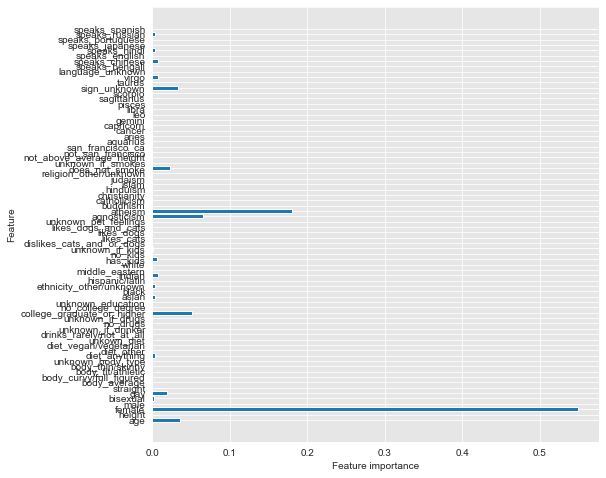

In [119]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [120]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[6928  281]
 [2038  333]]
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      7209
         1.0       0.54      0.14      0.22      2371

    accuracy                           0.76      9580
   macro avg       0.66      0.55      0.54      9580
weighted avg       0.72      0.76      0.70      9580



In [121]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 75.79%


In [122]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [123]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [124]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        presort=False),
                  n_estimators=20)

In [125]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.7633712635278561

In [126]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.7608559498956159

In [127]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [128]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_depth=5, random_state=123)

In [129]:
forest.score(data_train, target_train)

0.7499739012423009

In [130]:
forest.score(data_test, target_test)

0.752713987473904

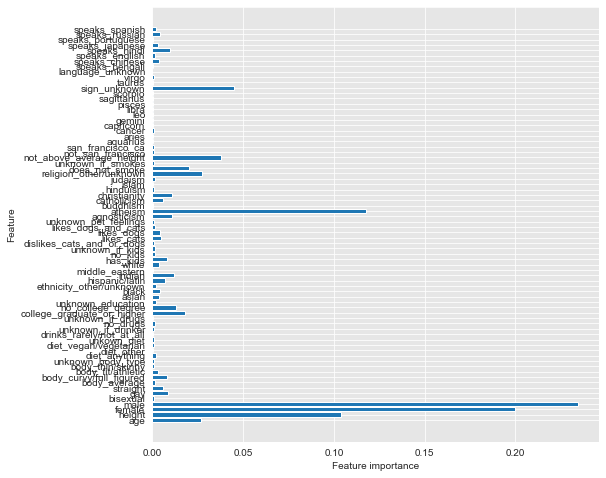

In [131]:
plot_feature_importances(forest)

In [132]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [133]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5,
                       random_state=123)

In [134]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

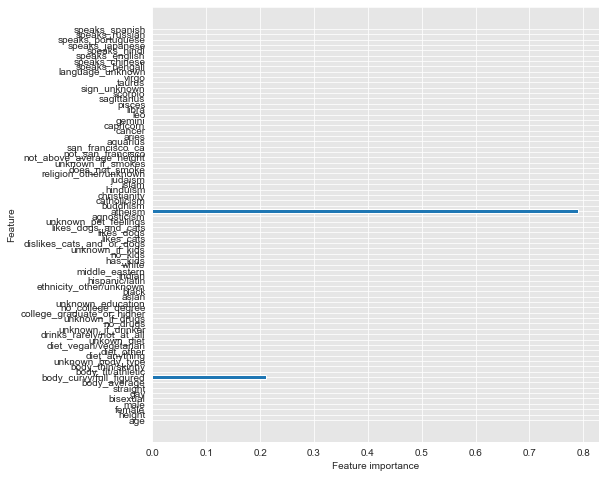

In [135]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [136]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

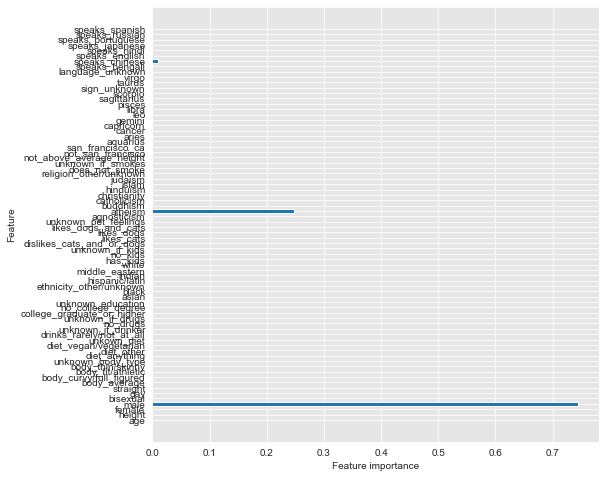

In [137]:
# Feature importance
plot_feature_importances(rf_tree_2)

# Conclusion 

Based off of what I see here I think i will end up using random forest. Before I make that decision final, however, I will need to rebalance my classes and test again which I will do in a seperate notebook. 